<a href="https://colab.research.google.com/github/cafmf/introd-cd/blob/master/projeto-introdu%C3%A7%C3%A3o-cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Leitura dos dados sobre as avalição feitas ao serviço do airbnb na cidade de Nova York

In [0]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/cafmf/introd-cd/master/AB_NYC_2019.csv'
airbnb_df = pd.read_csv(url)

2 - Visualizando tamanho do frame


In [24]:
airbnb_df.shape

(48895, 16)

3 - Descrevendo os dados para análise de possiveis valores com muita discrepância. Baseado na descrição dos dados, os campos de price e minimum_nights são passíveis de possuir outliers

In [26]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


4 - Visualização para análise de outliers para o campo price utilizando log na base 10 para otimizar visualição

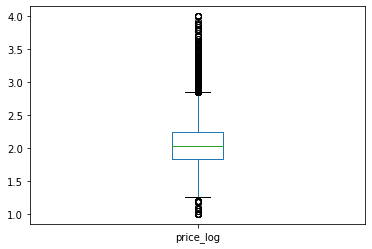

In [27]:

airbnb_df['price_log'] = np.log10(airbnb_df[airbnb_df['price'] > 0]['price'])
airbnb_df['price_log'].plot.box()

5 - Removendo outliers para o campo "Price"

In [29]:
q1 = airbnb_df['price'].quantile(q=0.25)
q3 = airbnb_df['price'].quantile(q=0.75)
iqr = q3 - q1
airbnb_df = airbnb_df[(airbnb_df['price'] > (q1-1.5*iqr)) & (airbnb_df['price'] < (q3+1.5*iqr))]
airbnb_df.shape

(44977, 17)

6 - Visualização para análise de outliers para o campo minimum_nights utilizando log na base 10 para otimizar visualição

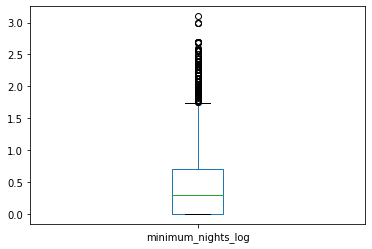

In [30]:
airbnb_df['minimum_nights_log'] = np.log10(airbnb_df[airbnb_df['minimum_nights'] > 0]['minimum_nights'])
airbnb_df['minimum_nights_log'].plot.box()

7 - Removendo outliers para o campo minimum_nights

In [31]:
q1 = airbnb_df['minimum_nights'].quantile(q=0.25)
q3 = airbnb_df['minimum_nights'].quantile(q=0.75)
iqr = q3 - q1
airbnb_df = airbnb_df[(airbnb_df['minimum_nights'] > (q1-1.5*iqr)) & (airbnb_df['minimum_nights'] < (q3+1.5*iqr))]
airbnb_df.shape

(38935, 18)